# <center>R2.09 - Méthodes numériques <br>TP2 - "Just One More" Paradox<center>

<center>
    <em>Tom Ferragut, Thibault Godin, Lucie Naert</em>
</center>
    
<center>
<strong><em>IUT de Vannes, BUT Informatique</em></strong>
</center>

<div style="text-align: right"> <em>One more time if you please <br> --The Clash </em> </div>

    
    
Ce TP fait suite au TP3 de **Outils numériques pour les statistiques**. 
    

On va chercher à trouver une stratégie qui maximise le gain.
    
Le TP est inspiré de la vidéo Youtube suivante.
- https://youtu.be/_FuuYSM7yOo?si=HBCPLJnIFsoM4prG 


### Imports

In [1]:
# importation des packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

C:\Users\omerf\AppData\Local\Temp\ipykernel_22832\3439630666.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 1 - "Just One More" Paradox

Jouons à un jeu :
- Vous commencez avec 100€, et jouez à Pile ou Face plusieurs fois d'affilés. 
- À chaque fois que vous obtenez un Pile, vous gagnez $80\%$ de votre cagnotte.
- À chaque fois que vous obtenez Face vous perdez $50\%$ de votre cagnotte.

Une pièce (équilibré) ayant autant de chance d'obtenir Pile ou Face, votre gain moyen est :
$$\text{Gain Moyen}=\left(\frac{1}{2}\times 0,8 - \frac{1}{2} \times 0.5 \right) \text{Cagnotte}=0.15 \times \text{Cagnotte} > 0 !!!$$ 

En moyenne on a donc l'impression que l'on gagne de l'argent ! Joueriez-vous à ce jeu ?

--------------------

Nous vu dans le TP de statistiques que ce jeu n'est en fait pas forcément avantageux pour le joueur, celon qu'on parle de gain _moyen_ ou _médian_. C'est pourquoi on parle de **paradoxe**. 


--------------------



### Simulation et étude du paradoxe

>À la fin du TP précédent, on avait (demandé d') implémenté une fonction `simulation_cagnotte` que l'on redonne ici :
>
>Elle a pour paramètres : 
>- Le type de stratégie
>- Les paramètres de gains et de pertes
>- Le nombre d'individus
>- Le nombre de lancés
>
>Et elle trace sur un même graphique :
>- L'évolution de la cagnotte de chaque individus 
>- Lévolution de la moyenne et de la médiane.
>


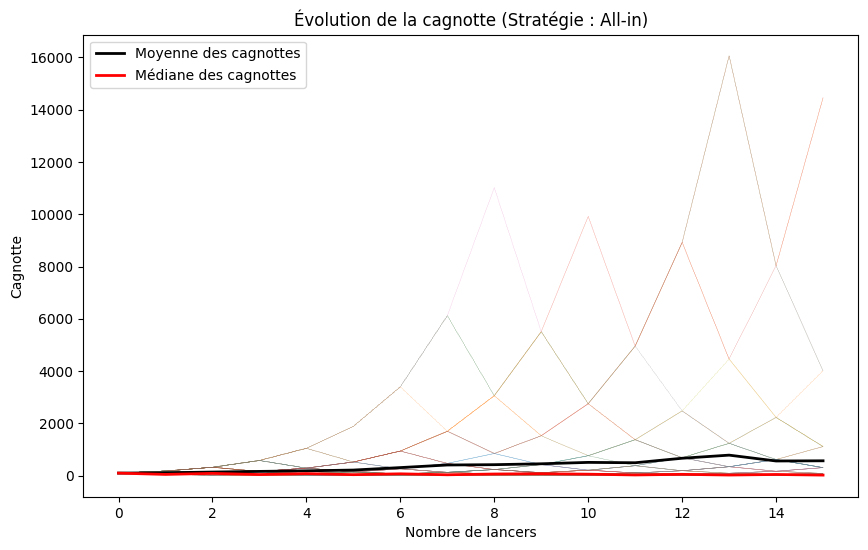

Moyenne = 570.7379039956293
Médiane = 23.914845000000007


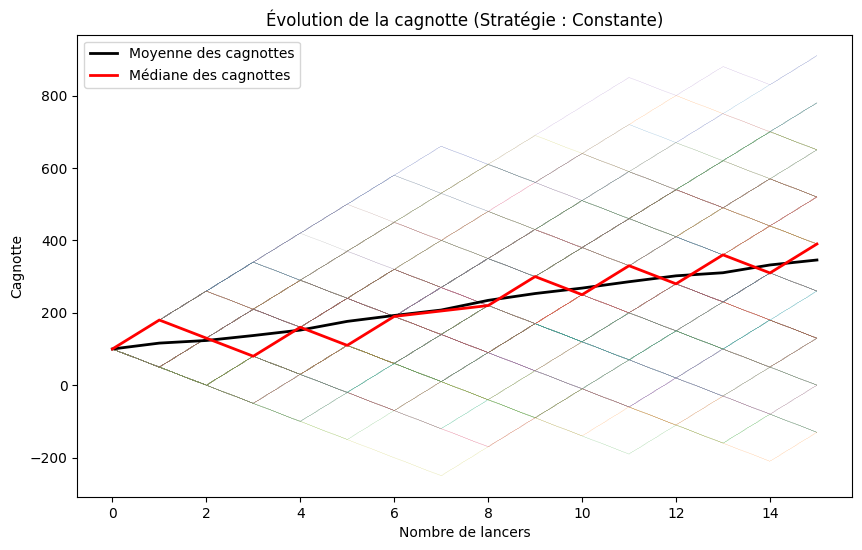

Moyenne = 345.8
Médiane = 390.0


In [4]:
def simulation_cagnotte(strategie, gains, pertes, nombre_individus, nombre_lances):
    
    cagnotte_par_individu = np.full((nombre_individus, nombre_lances + 1), 100.0)    
    
    ################################################################
    ### Création de la liste contenant l'évolution des cagnottes ###
    ################################################################
    
    for lance in range(1, nombre_lances + 1):
        
        #La stratégie 'constante' mise toujours la même quantité d'argent
        if strategie == 'constante':
            resultats_lances = np.random.randint(2, size=nombre_individus)  # Simulation Pile ou Face
            gains_pertes = np.where(resultats_lances == 1, 100*gains, -100*pertes)
        
        #La stratégie 'all-in' mise tout à chaque nouveau lancé de dés    
        elif strategie == 'all-in':
            resultats_lances = np.random.randint(2, size=nombre_individus)  # Simulation Pile ou Face
            gains_pertes = np.where(resultats_lances == 1, cagnotte_par_individu[:, lance - 1] * gains, -cagnotte_par_individu[:, lance - 1] * pertes)
        else:
            raise ValueError("Stratégie non valide.")
        
        #Ajout
        cagnotte_par_individu[:, lance] = cagnotte_par_individu[:, lance - 1] + gains_pertes
        
    ##########################
    ### Début de la Figure ###
    ##########################
    
    plt.figure(figsize=(10, 6))
    
    # Trace l'évolution de la cagnotte de chaque individu
    for individu in range(nombre_individus):
        plt.plot(range(nombre_lances + 1), cagnotte_par_individu[individu, :],linewidth=.3,linestyle='dotted', label='_nolegend_')
    
    # Trace l'évolution de la moyenne et de la médiane
    plt.plot(range(nombre_lances + 1), np.mean(cagnotte_par_individu, axis=0), label='Moyenne des cagnottes', color='black', linewidth=2)
    plt.plot(range(nombre_lances + 1), np.median(cagnotte_par_individu, axis=0), label='Médiane des cagnottes', color='red', linewidth=2)
    
    
    plt.title(f"Évolution de la cagnotte (Stratégie : {strategie.capitalize()})")
    plt.xlabel("Nombre de lancers")
    plt.ylabel("Cagnotte")
    plt.legend()
    plt.show()
    
    #Affichage de la moyenne et de la médiane
    print('Moyenne =', np.mean(cagnotte_par_individu[:,lance]))
    print('Médiane =', np.median(cagnotte_par_individu[:,lance]))
    
    
# Exemple d'utilisation avec une stratégie Pile ou Face, gains de 1 et pertes de 0.5
simulation_cagnotte('all-in', 0.8, 0.5, 100, 15)
simulation_cagnotte('constante', 0.8, 0.5, 100, 15)


# 2 - Stratégie du parieur prudent :  parier une fraction de son argent

On a vu dans le TP de statistique que si l'on re-mise toute notre cagnotte alors notre jeu était largement gagnant en moyenne, mais que la médiane était très faible ; tandis que si l'on mise une somme fixe la moyenne et la médiane sont similaires mais croissent assez doucement


On va maintenant chercher à maximiser le gain médian, tout en gagnant rapidement beaucoup d'argent.

Modifions la stratégie : on va uniquement parier $10\%$ de notre cagnotte à chaque tour
- Vous commencez avec 100€, et jouez à Pile ou Face plusieurs fois d'affilés. 
- À chaque fois que vous obtenez un Pile, vous gagnez $80\%$ de votre mise.
- À chaque fois que vous obtenez Face vous perdez $50\%$ de votre mise.



## 2.a - Gain moyen

Une pièce (équilibrée) ayant autant de chance d'obtenir Pile ou Face, votre gain moyen si vous misez $10\%$ de votre cagnotte est :
$$\text{Gain Moyen}=\frac{1}{2}\times  (\text{Cagnotte} +  \text{Cagnotte}\times \frac{10}{100}  \times 0,8) + \frac{1}{2} \times (\text{Cagnotte}-   \text{Cagnotte}\times \frac{10}{100} \times 0,5)$$ 










>**_Question 1 :_** 
>
>Calculer le gain moyen attendu à chaque tour avec cette stratégie. Comment (en temps que suite) évolue le gain moyen  (i.e. quelle suite classique reconnait-on) ?
>
>En déduire la limite du gain moyen.


On a 50% de chances d'ajouter 80% de notre mise qui est 10% de notre cagnotte.
On a 50% de chances de soustraire 50% de notre mise qui est 10% de notre cagnotte.

(1/2 * (C + C * (10/100) * 0.8) + 1/2 * (C - C * (10/100) * 0.5))

(1/2 (C + 0.08C + C - 0.05C))

(1/2 * (2.03C))

1.015 C

A chaque étape on gagne 1,5% de ma cagnotte.
Gain Moyen = 1.015^n * 100

>**_Question 2 :_** 
>
>Modifier la fonction `simulation_cagnotte` en une fonction `simulation_cagnotte_partielle` en ajoutant un paramètre `pourcentage` afin de simuler cette nouvelle stratégie de pari d'une fraction de la cagnotte.
>
>Ajouter aux tracés déjà existants le tracé du gain moyen théorique calculé dans la $\textbf{Question 1}$ ci-dessus.

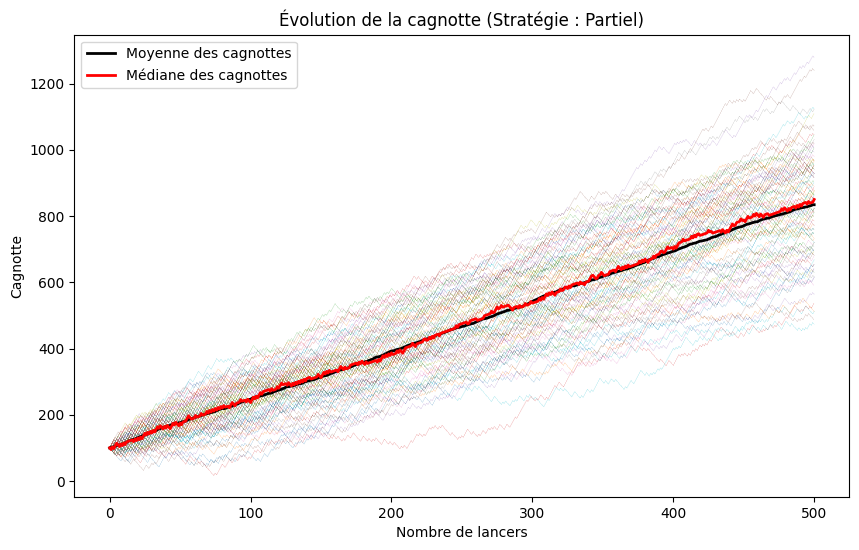

Moyenne = 834.14
Médiane = 850.0


In [15]:
def simulation_cagnotte_partielle(pourcentage, gains, pertes, nombre_individus, nombre_lances):
    cagnotte_par_individu = np.full((nombre_individus, nombre_lances + 1), 100.0)    
    
    ################################################################
    ### Création de la liste contenant l'évolution des cagnottes ###
    ################################################################
    
    for lance in range(1, nombre_lances + 1):
        cagnotteParRound = cagnotte_par_individu[:, lance] * pourcentage
        resultats_lances = np.random.randint(2, size=nombre_individus)  #Simulation Pile ou Face
        gains_pertes = np.where(resultats_lances == 1, cagnotteParRound*gains, -cagnotteParRound*pertes)
        
        #Ajout
        cagnotte_par_individu[:, lance] = cagnotte_par_individu[:, lance - 1] + gains_pertes



    ##########################
    ### Début de la Figure ###
    ##########################
    
    plt.figure(figsize=(10, 6))
    
    # Trace l'évolution de la cagnotte de chaque individu
    for individu in range(nombre_individus):
        plt.plot(range(nombre_lances + 1), cagnotte_par_individu[individu, :],linewidth=.3,linestyle='dotted', label='_nolegend_')
    
    # Trace l'évolution de la moyenne et de la médiane
    plt.plot(range(nombre_lances + 1), np.mean(cagnotte_par_individu, axis=0), label='Moyenne des cagnottes', color='black', linewidth=2)
    plt.plot(range(nombre_lances + 1), np.median(cagnotte_par_individu, axis=0), label='Médiane des cagnottes', color='red', linewidth=2)
    
    
    plt.title(f"Évolution de la cagnotte (Stratégie : Partiel)")
    plt.xlabel("Nombre de lancers")
    plt.ylabel("Cagnotte")
    plt.legend()
    plt.show()
    
    #Affichage de la moyenne et de la médiane
    print('Moyenne =', np.mean(cagnotte_par_individu[:,lance]))
    print('Médiane =', np.median(cagnotte_par_individu[:,lance]))
   
   
# 
simulation_cagnotte_partielle(.1, 0.8, 0.5, 100, 500)


-------------

## 2.b - Gain médian

Une formule plus compliquée permet de calculer le taux de croissance du gain médian dans cette situation :
$$\text{Gain Médian}=\left(1 +  \frac{10}{100}  \times 0,8\right)^{\frac{1}{2}} \cdot \left(1-   1\times \frac{10}{100} \times 0,5\right)^{\frac{1}{2}}$$ 

Le gain médian après $n$ tours est alors


$$\text{Gain Médian}_n = \text{Cagnotte} \cdot \left(\left(1 +  \frac{10}{100}  \times 0,8\right)^{\frac{1}{2}} \cdot \left(1-   1\times \frac{10}{100} \times 0,5\right)^{\frac{1}{2}}\right)^n$$




-----------

>**_Question 3 :_** Calculer le gain médian pour nos paramètres actuels (pourcentage de mise : $10\%$, gain en cas de victoire à $80\%$ et pertes en cas de défaite à $50\%$)
>
>En déduire la limite de la médiane du gain.
>
>Ajouter un tracé du gain médian théorique calculé à la fonction `simulation_cagnotte_partielle`.

GainMédian = Cagnotte * ((1.08)^1/2) * 



----------------

# 3 - Recherche du gain le plus rapide




## 3.a - Approximation de la dérivée


Maintenant que l'on voit qu'il est possible d'obtenir une moyenne **et** une médiane qui tendent vers l'infini, on peut être encore plus ambitieux et vouloir gagner de l'argent le plus vite possible.

On reste prudent, et on cherche donc à maximiser le _taux de croissance du gain médian_
Cela revient à chercher le pourcentage de notre cagnotte à miser $p \in [0,1]$ tel que 

$$\text{Gain Médian}(p) = (1 + p \times 0,8)^{\frac{1}{2}} . (1-   p \times 0,5)^{\frac{1}{2}}$$ 

soit maximum.


>**_Question 1 :_** 
>
>Tracer le gain médian en fonction de $p$.



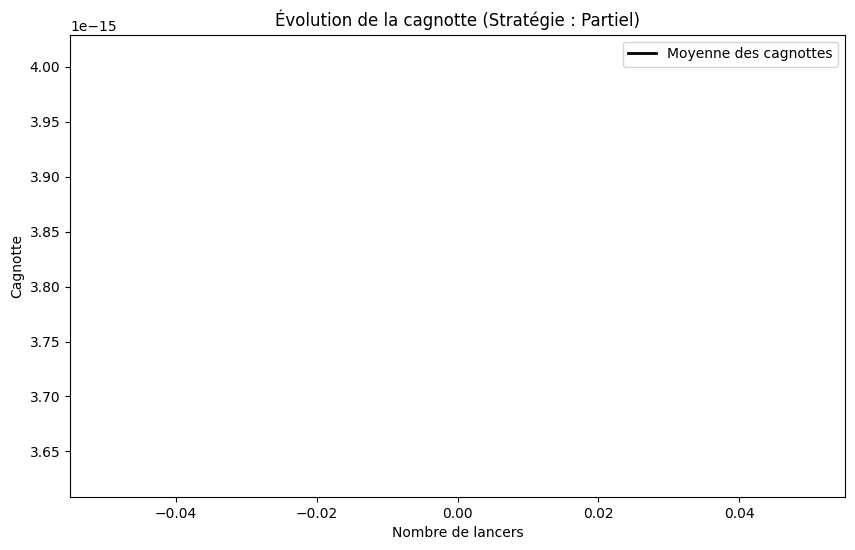

In [9]:
TODO

def gain_median_visu(gains = .8, pertes = .5):
    for p in range(100):
        gainMedian = ((1+p*0.8) ** (1/2)) * ((1-p*0.5) ** (1/2))
    

    ##########################
    ### Début de la Figure ###
    ##########################
    
    plt.figure(figsize=(10, 6))

    # Trace l'évolution de la moyenne et de la médiane
    plt.plot(range(1), gainMedian, label='Moyenne des cagnottes', color='black', linewidth=2)
    
    
    plt.title(f"Évolution de la cagnotte (Stratégie : Partiel)")
    plt.xlabel("Nombre de lancers")
    plt.ylabel("Cagnotte")
    plt.legend()
    plt.show()

gain_median_visu()

Dans notre cas le maximum semble être atteint autour de $40\%$ de la cagnotte remise en jeu à chaque tour ; mais on aimerait être plus précis.

Pour cela il faudrait calculer la dérivée et chercher où elle s'annule. Cependant la fonction $$\text{Gain Médian}(p) = (1 + p \times 0,8)^{\frac{1}{2}} . (1-   p \times 0,5)^{\frac{1}{2}}$$ 

est compliquée à dérivée (même si on saurait le faire !).

On va donc utiliser une approximation de la dérivée :

$$f'(a) \approx \frac{f(a+t) -f(a-t)}{2t}$$
pour $t$ un réel assez petit.

>**_Question 2 :_** 
>
>Écrire une méthode `derivee_approx` qui effectue cette approximation, c'est à dire qui prend comme argument une fonction `f`, un point où dériver `a` et un pas `t` et qui nous renvoi le calcul approché de $f'(a)$.
>
>Tracer l'approximation de la dérivée de $\text{Gain Médian}(p)$ pour un pas $t=10^{-5}$.


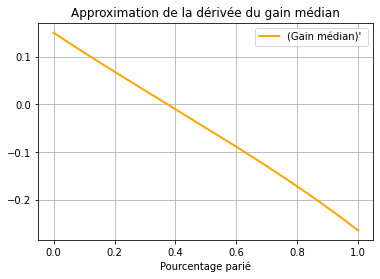

In [5]:
def derivee_approx(f,a,t=10**(-5)):
    
    return -1


def GainMedian(p):

    
    return -1
def gain_median_derive_visu():

    print("TODO")

gain_median_derive_visu()

Visuellement on voit mieux que le maximum doit être atteint un peu avant $40\%$, mais cela reste assez vague.

## 3.b - Approximation de l'optimum (critère de Kelly) : dichotomie

Pour trouver précisément notre maximum, on va implémenter l'algorithme de la dichotomie.

>**_Question 1 :_** 
>
>Implémenter une fonction `dichotomie` et s'en servir en combinaison avec la $\textbf{Question 2}$ de la partie $\textbf{3.a}$ pour trouver la valeur (une approximation) du paramètre $p$ optimal pour notre problème.
>
>Comparer avec la valeur théorique (que l'on ne calculera pas nous même), $p=0,375$


In [6]:
def dichotomie(f, a, b, epsilon=.0001):

    return -1


dichotomie(lambda x : derivee_approx(GainMedian,x),0,1)

(0.37493896484375, 14)

>**_Question bonus :_** 
>
>Illustrer la recherche dichotomique, faire varier les paramètres de gains et de pertes ...